# Create named function from an expression

This is not implemented inside `fun_expr`. Sometimes it is useful to have named functions that know about their name and can use this

Initialisations:

In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np

from IPython.display import display, Math, display_latex, Latex

from fun_expr import Function_from_Expression as FE

To create named functions, subclass FE:

In [2]:
class Named_Function_from_Expression(FE):
    """
    Create a named function from an expression.
    
    Example fo use:
    >>> from sympy import *
    >>> from fun_expr import (
            Function_from_Expression as FE,
            Named_Function_from_Expression as NFE,
            )
    >>> f = NFE("f", x, x**2)
    >>> f.displ()
    '$f(x) = x^{2}$'
    >>> f_1 = f.diff(x,name="f'")
    >>> f_1.displ()
    "$f'(x) = 2 x$"
    >>> f_1 = f.diff(x)
    '((x) \mapsto 2\,x)'
    >>> print(type(f_1))
    fun_expr.function_from_expression.Function_from_Expression
    >>> f.displ(2)
    '$f(2) = 4$'
    """
    
    def __new__(cls, name, variables, expr):
        obj = FE.__new__(cls, variables, expr)
        obj.name = name
        return obj
    
    def displ(self, *values, par="$", n=False, simplify=False):
        """
        This is a convenience function to display the equation 
        
          $$f(*values) = expr.subs(variables,values)$$ 
        
        in latex-notation. For inline display use par='$'.
        
        If val is None: display $$f(var) = expr$$ instead.
        
        If n ist True, replace the rhs by rhs.n().
        If n is an integer number replace the rhs by rhs.n(n).
        
        If simplify is true, simplify rhs of the equation.
        
        Here rhs always is the right hand side of the equation.
        """
        
        if values and not len(values) == len(self.variables):
            raise ValueError('Exactly {l} arguments needet. Given arguments: {v}'.\
                             format(l=len(self.variables),v=values))
        vals = values if values else self.variables
        rhs = self.expr.subs(zip(self.variables, vals))
        if n is not None:
            if isinstance(n, bool):
                if n:
                    rhs = rhs.n()
            else:
                rhs = rhs.n(n)
            
        if simplify:
            rhs = rhs.simplify()
            
        ret_val = "$" + self.name
        ret_val += "({vars}) = ".format(vars=','.join(latex(v) for v in vals))
        ret_val += latex(rhs) + "$"
        return ret_val
    
    def diff(self, *symbols, **assumptions):
        name = assumptions.pop('name',None)
        as_function = assumptions.pop('as_function', True)
        res = super().diff(*symbols, as_function=as_function, **assumptions)
        if name is not None:
            return Named_Function_from_Expression(name, res.variables, res.expr)
        else:
            return res
        
    def integrate(self, *args, **kwargs):
        name = kwargs.pop('name',None)
        as_function = kwargs.pop('as_function', name is not None)
        res = super().integrate(*args, as_function=as_function, **kwargs)
        if name is not None:
            return Named_Function_from_Expression(name, res.variables, res.expr)
        else:
            return res

In [3]:
x = Symbol('x')
f = Named_Function_from_Expression("f",x,x**2)
f.displ()

'$f(x) = x^{2}$'

In [4]:
# to have nice output:
Math(f.displ())

<IPython.core.display.Math object>

In [5]:
display(f.displ(2))
display(Math(f.displ(2)))

'$f(2) = 4$'

<IPython.core.display.Math object>

In [6]:
f_1 = f.diff(x,name="f'")
display(f_1.displ())
display(Math(f_1.displ()))

"$f'(x) = 2 x$"

<IPython.core.display.Math object>

If no name is specified for `f.diff(x)`, a function of class `FE` is returned:

In [7]:
f_1 = f.diff(x)
display(f_1)
display(type(f_1))
print(f_1)

fun_expr.function_from_expression.Function_from_Expression

Lambda(x, 2*x)


In [8]:
a,x = symbols('a,x')
g = Named_Function_from_Expression('g', x, a*x**2)
display(g)
display(Math(g.displ()))

<IPython.core.display.Math object>

In [9]:
Math(g.displ(1))

<IPython.core.display.Math object>

In [10]:
Math(g.displ(a))

<IPython.core.display.Math object>

In [11]:
display(g.diff(x))
display(type(g.diff(x)))

fun_expr.function_from_expression.Function_from_Expression

In [12]:
display(Math(g.diff(x,name="g'").displ()))
display(type(g.diff(x,name="g'")))

<IPython.core.display.Math object>

__main__.Named_Function_from_Expression

Integration leads to an expression, not to a function:

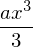

In [13]:
g_0 = g.integrate(x)
g_0

If `as_function=True` is set, the result is of type `FE`:

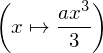

fun_expr.function_from_expression.Function_from_Expression

In [14]:
g_0 = g.integrate(x,as_function=True)
display(g_0)
display(type(g_0))

If `as_function=True` is set and an name is specified, the result is of type `Named_Function_from_Expression`:

In [15]:
g_0 = g.integrate(x,name="g_0")
display(Math(g_0.displ()))
display(type(g_0))

<IPython.core.display.Math object>

__main__.Named_Function_from_Expression

In [16]:
Math(g_0.displ(3))

<IPython.core.display.Math object>

Named functions of more then one variable are possible, too.

In [17]:
x,y,z = symbols('x,y,z')

h = Named_Function_from_Expression('h',(x,y,z), a*x*y*z)
Math(h.displ())

<IPython.core.display.Math object>

In [18]:
Math(h.diff(z,name=r"\frac{\partial}{\partial z}\,h").displ(simplify=True))

<IPython.core.display.Math object>